<a href="https://colab.research.google.com/github/arutraj/.githubcl/blob/main/M4_Live_Class_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scipy

Python library for doing optimization, linear algebra and also statistics!

#### Installation

just run this command on the command line
`pip install scipy`

#### statistics library

there are many usages of scipy but here we are only interested in statistics related functions.

`scipy.stats` this library has all the statistics related functions that we will use.




### Hypothesis testing

In [ ]:
# !pip install matplotlib-venn

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, sem, ttest_ind, t, f_oneway, f
import matplotlib.pyplot as plt
import seaborn as sns
import random



###
This code generates two random samples of size 100 from a normal distribution.
It then performs a two-sample t-test on the two samples to see if they are significantly different.
The results of the t-test are printed to the console.
The `ttest_ind` function in the scipy.stats module performs a two-sample t-test.

In [2]:
# Generate two random samples of size 100 from a normal distribution.
random.seed(10)

In [3]:
# Generate two random samples of size 100 from a normal distribution.
sample_size = 100
v1 = np.random.normal(size=sample_size)
v2 = np.random.normal(size=sample_size)

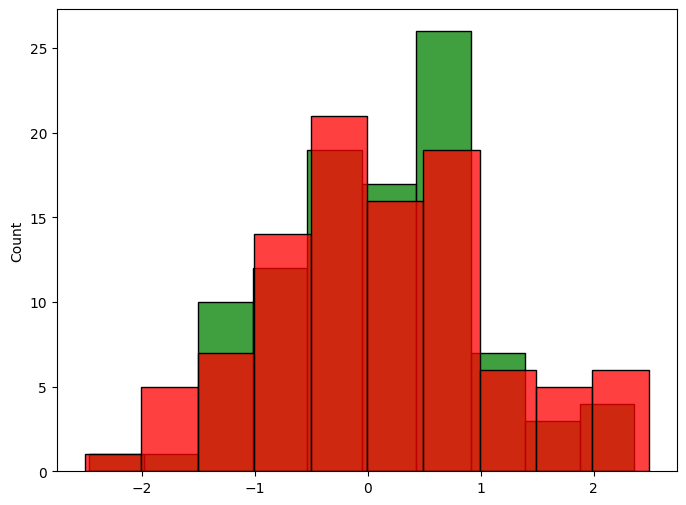

In [4]:

plt.figure(figsize= (8, 6))

sns.histplot(v1, color='g')
sns.histplot(v2, color='r')

plt.show()

In [5]:
# check variances - should be similar if we would
# like to test the assumptions of the 2 sample t test
print(f"Variance of v1 is {v1.var()} \nVariance of v2 is {v2.var()}")

print()

print(f"Mean of v1 is {v1.mean()} \nMean of v2 is {v2.mean()}")

Variance of v1 is 0.8010350984398044 
Variance of v2 is 1.0278324007271262

Mean of v1 is 0.09527138442684212 
Mean of v2 is 0.12426500466420898


In [8]:
res = ttest_ind(v1,v2)
print(res)

TtestResult(statistic=-0.21331869707088794, pvalue=0.8312978753165017, df=198.0)


In [6]:
# Perform a two-sample t-test on the two samples to see if they are significantly different.
res = ttest_ind(v1, v2, alternative='two-sided')

# Print the results of the t-test to the console.
print(res)
print()
print(f"T statistic: {res[0]}")
print(f"p-value corresponding to this t statistic: {res[1]}")

TtestResult(statistic=-0.21331869707088794, pvalue=0.8312978753165017, df=198.0)

T statistic: -0.21331869707088794
p-value corresponding to this t statistic: 0.8312978753165017


### DOF in this case is 198 and we can calculate the p value using the t distribution cdf function for dof 198 and critical value of -0.73 and get the same value as the ttest_ind function giving us.

In [7]:
# dof = (sample_size first gp - 1) + (sample_size second gp - 1)
dof = (sample_size-1) + (sample_size-1)

In [9]:
# the critical t value # t_alpha = t_0.05
significance_level = 0.05
crit_t_value = t.ppf(1-0.05/2, dof)
print(f"Critical t value: {crit_t_value}")

Critical t value: 1.9720174778338955


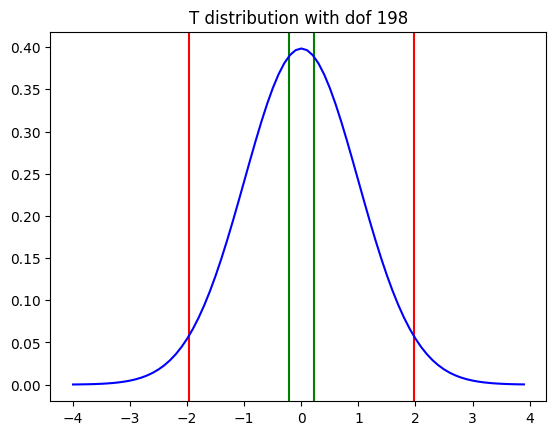

In [10]:
x = np.arange(-4,4,0.1)
t_dist = t.pdf(x,dof)
plt.axvline(x=-res[0],  color = 'green')
plt.axvline(x=res[0], color = 'green')
plt.axvline(crit_t_value, color = 'red')
plt.axvline(-crit_t_value, color = 'red')
plt.title(f"T distribution with dof {dof}")
plt.plot(x, t_dist, 'blue')


In [ ]:
# # calculate p values
# (t.cdf(res[0], dof))*2

### In this case, we have subtly challenged the data. Now one of the varibales is with mean of 1 and one with mean 0 and we expect the t test to reject the null hypothesis this time as the two varibales have different means.

In [11]:
v1 = np.random.normal(loc=1, size=sample_size)
v2 = np.random.normal(size=sample_size)

res = ttest_ind(v1, v2)

print(res)

print()

print(f"T statistic: {res[0]}")
print(f"p-value corresponding to this t statistic: {res[1]}")

TtestResult(statistic=8.702752811640506, pvalue=1.259680519181945e-15, df=198.0)

T statistic: 8.702752811640506
p-value corresponding to this t statistic: 1.259680519181945e-15


In [12]:
# check variances - should be similar if we would
# like to test the assumptions of the 2 sample t test
print(f"Variance of v1 is {v1.var()} \nVariance of v2 is {v2.var()}")

print()

print(f"Mean of v1 is {v1.mean()} \nMean of v2 is {v2.mean()}")

Variance of v1 is 1.0322361492685097 
Variance of v2 is 0.9457950375081748

Mean of v1 is 1.2306308355603013 
Mean of v2 is 0.00048778286564970407


In [13]:
dof = (sample_size-1) + (sample_size-1)

In [14]:
t.cdf(-6.437, 198)*2

9.003843808958688e-10

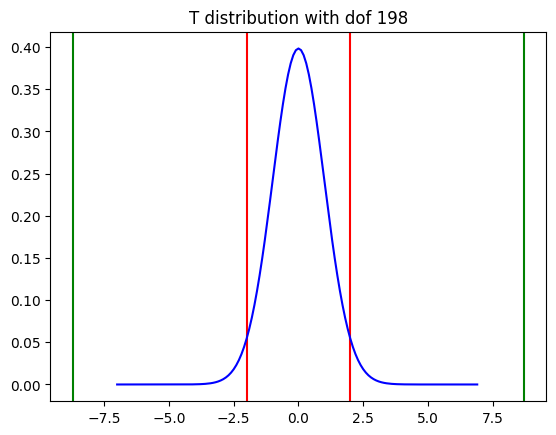

In [15]:
x = np.arange(-7,7,0.1)
t_dist = t.pdf(x,dof)
plt.axvline(x=-res[0], color = 'green')
plt.axvline(x=res[0], color = 'green')
plt.axvline(crit_t_value, color = 'red')
plt.axvline(-crit_t_value, color = 'red')
plt.title(f"T distribution with dof {dof}")
plt.plot(x, t_dist, 'blue')


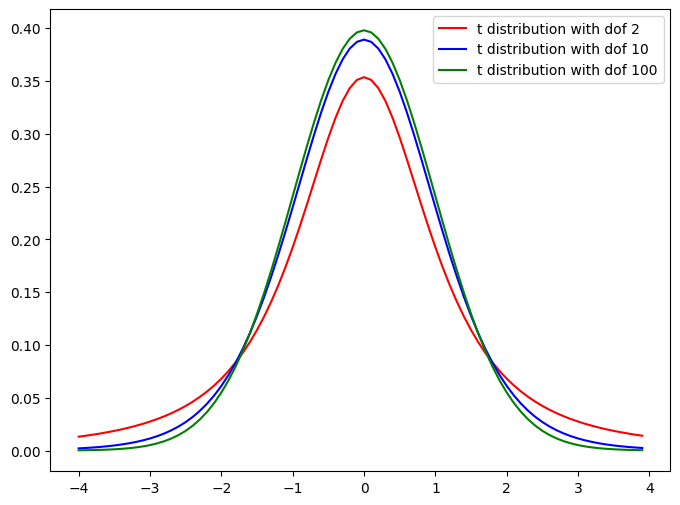

In [16]:
lower_dof = 2
higher_dof = 10
even_higher_dof = 100
x = np.arange(-4,4,0.1)
lower_df = t.pdf(x,lower_dof)
higher_df = t.pdf(x,higher_dof)
even_higher_df = t.pdf(x,even_higher_dof)
plt.figure(figsize=(8,6))
plt.plot(x, lower_df, c = 'red', label = f't distribution with dof {lower_dof}')
plt.plot(x, higher_df, 'blue', label = f't distribution with dof {higher_dof}')
plt.plot(x, even_higher_df, 'green', label = f't distribution with dof {even_higher_dof}')
plt.legend()

plt.show()

### ANOVA

###
This code generates four random samples of size 100 from a normal distribution.
It then performs a one-way ANOVA test on the four samples to see if their means are significantly different.
The results of the ANOVA test are printed to the console.

In [17]:
from numpy.core.multiarray import result_type
sample_size = 100
v1 = np.random.normal(size=sample_size)
v2 = np.random.normal(size=sample_size)
v3 = np.random.normal(size=sample_size)
v4 = np.random.normal(size=sample_size)

res = f_oneway(v1, v2, v3, v4)

print(result_type)
print()
print(f"F statistic: {res[0]}")
print(f"p-value corresponding to this F statistic: {res[1]}")

<built-in function result_type>

F statistic: 1.0667788369701448
p-value corresponding to this F statistic: 0.3630327673335006


In [18]:
# calcualte the critical f value
# this is the inverse of cdf (what is the probability to the left of the given value)
# ppf says what is the value that gives me the given probability to the left of it
f_crit_value = f.ppf(1 - 0.05, 3, 396, loc=0, scale=1)
print(f" The critical f value for this distribution is : {f_crit_value}")

 The critical f value for this distribution is : 2.6274407695704896


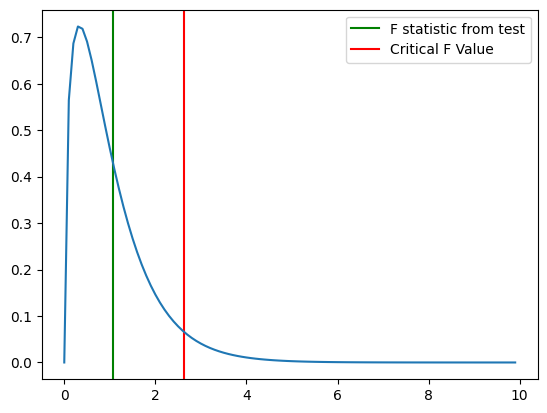

In [19]:
# degrees of freedom in F test for ANOVA
# F_stat = between group variance/ wothin group variance
# numerator df = #groups - 1
# denominator df = #points - #groups
x = np.arange(0,10,0.1)
f_distribution = f.pdf(x,3, 396)
plt.axvline(x=res[0], color='green', label = 'F statistic from test')
plt.axvline(f_crit_value, color='red', label = 'Critical F Value')
plt.legend()
plt.plot(x, f_distribution)

In [20]:
print("The P value corresponding to this F statistic is: {}".format(1- f.cdf(res[0], 3, 396)))

The P value corresponding to this F statistic is: 0.363032767333497


Here, again we have very similar setting but one of the variables has a mean of 1 and we expect our t test to now reject the null hypothesis that all means are same.

In [21]:
sample_size = 100
v1 = np.random.normal(size=sample_size)
v2 = np.random.normal(size=sample_size)
v3 = np.random.normal(size=sample_size)
v4 = np.random.normal(loc=1, size=sample_size)

res = f_oneway(v1, v2, v3, v4)

print(res)
print()
print(f"F statistic: {res[0]}")
print(f"p-value corresponding to this F statistic: {res[1]}")

F_onewayResult(statistic=27.9937979518451, pvalue=1.9469750104679741e-16)

F statistic: 27.9937979518451
p-value corresponding to this F statistic: 1.9469750104679741e-16


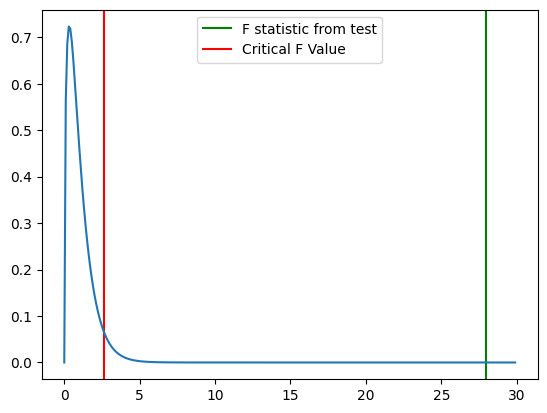

In [22]:
# degrees of freedom in F test for ANOVA
# F_stat = between group variance/ wothin group variance
# numerator df = #groups - 1
# denominator df = #points - #groups
x = np.arange(0,30,0.1)
f_distribution = f.pdf(x,3, 396)
plt.axvline(x=res[0], color='green', label = 'F statistic from test')
plt.axvline(f_crit_value, color='red', label = 'Critical F Value')
plt.legend()
plt.plot(x, f_distribution)

In [ ]:
print("The P value corresponding to this F statistic is: {}".format(1- f.cdf(res[0], 3, 396)))

The P value corresponding to this F statistic is: 2.6645352591003757e-15
